In [1]:
import sys
import os

# Esto busca la ruta a la carpeta raíz del proyecto (LatentLens)
# y la añade al "mapa" de Python temporalmente.
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

      # Configuración para que los gráficos se muestren en el notebook
%matplotlib inline

In [2]:
# Importamos la función que acabamos de crear desde nuestro nuevo script.
# Ahora la ruta 'src' debería ser reconocida gracias al setup.py.
from src.data_loader import load_and_prepare_data

# Llamamos a la función
main_df = load_and_prepare_data()

# Verificamos que funcionó, mostrando las primeras 5 filas.
main_df.head()

Cargando los datasets...
Datos de películas cargados: 62423 filas.
Datos de calificaciones cargados: 25000095 filas.
Preprocesamiento completado. DataFrame final listo.


,userId,movieId,rating,title
0,1,296,5.0,Pulp Fiction (1994)
1,1,306,3.5,Three Colors: Red (Trois couleurs: Rouge) (1994)
2,1,307,5.0,Three Colors: Blue (Trois couleurs: Bleu) (1993)
3,1,665,5.0,Underground (1995)
4,1,899,3.5,Singin' in the Rain (1952)


In [ ]:
      # Define la ruta a la carpeta de datos
DATA_PATH = '../data/ml-25m/'

      # Carga los datasets en DataFrames de pandas
movies_df = pd.read_csv(f'{DATA_PATH}movies.csv')
ratings_df = pd.read_csv(f'{DATA_PATH}ratings.csv')

In [ ]:
print("Información de movies_df:")
movies_df.info()

print("\nPrimeras 5 filas de movies_df:")
movies_df.head()

Información de movies_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB

Primeras 5 filas de movies_df:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
print("Información de ratings_df:")
ratings_df.info()

print("\nEstadísticas descriptivas de ratings_df:")
ratings_df.describe()
      
print("\nChequeo de valores nulos en ratings_df:")
ratings_df.isnull().sum()

Información de ratings_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB

Estadísticas descriptivas de ratings_df:

Chequeo de valores nulos en ratings_df:


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

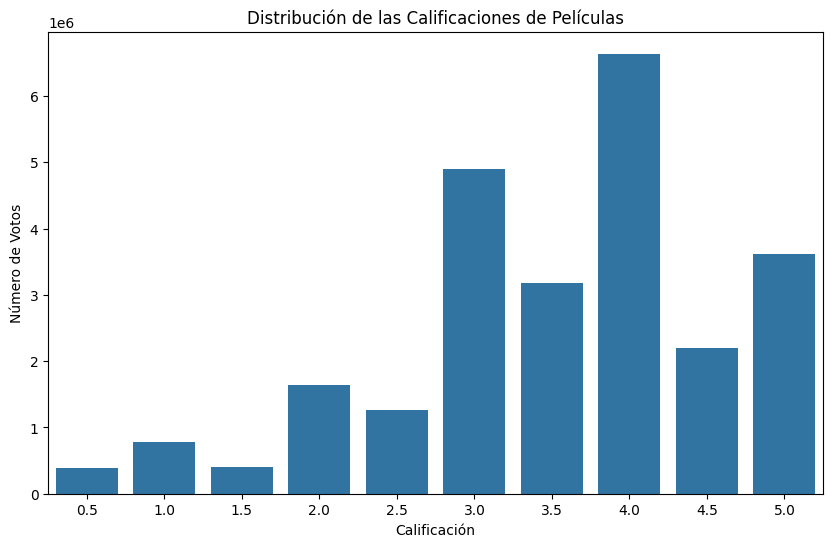

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings_df)
plt.title('Distribución de las Calificaciones de Películas')
plt.xlabel('Calificación')
plt.ylabel('Número de Votos')
plt.show()

In [ ]:
      #contar cuántas calificaciones tiene cada película
movie_counts = ratings_df['movieId'].value_counts()

      #unir esta información con los títulos de las películas
top_movies = movie_counts.to_frame().reset_index()
top_movies.columns = ['movieId', 'rating_count']
top_movies = pd.merge(top_movies, movies_df, on='movieId')

print("Top 10 películas con más calificaciones:")
top_movies.head(10)

Top 10 películas con más calificaciones:


,movieId,rating_count,title,genres
0,356,81491,Forrest Gump (1994),Comedy|Drama|Romance|War
1,318,81482,"Shawshank Redemption, The (1994)",Crime|Drama
2,296,79672,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,593,74127,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
4,2571,72674,"Matrix, The (1999)",Action|Sci-Fi|Thriller
5,260,68717,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
6,480,64144,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
7,527,60411,Schindler's List (1993),Drama|War
8,110,59184,Braveheart (1995),Action|Drama|War
9,2959,58773,Fight Club (1999),Action|Crime|Drama|Thriller


In [ ]:
      #contar cuántas calificaciones tiene cada película
movie_counts = ratings_df['movieId'].value_counts()

#unir esta información con los títulos de las películas
top_movies = movie_counts.to_frame().reset_index()
top_movies.columns = ['movieId', 'rating_count']
top_movies = pd.merge(top_movies, movies_df, on='movieId')

print("Top 10 películas con más calificaciones:")
top_movies.head(10)

Top 10 películas con más calificaciones:


,movieId,rating_count,title,genres
0,356,81491,Forrest Gump (1994),Comedy|Drama|Romance|War
1,318,81482,"Shawshank Redemption, The (1994)",Crime|Drama
2,296,79672,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,593,74127,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
4,2571,72674,"Matrix, The (1999)",Action|Sci-Fi|Thriller
5,260,68717,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
6,480,64144,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
7,527,60411,Schindler's List (1993),Drama|War
8,110,59184,Braveheart (1995),Action|Drama|War
9,2959,58773,Fight Club (1999),Action|Crime|Drama|Thriller


In [ ]:
      # contar cuantas peliculas ha calificado cada usuario
user_counts = ratings_df['userId'].value_counts()

print("\nTop 10 usuarios más activos:")
print(user_counts.head(10))


Top 10 usuarios más activos:
userId
72315     32202
80974      9178
137293     8913
33844      7919
20055      7488
109731     6647
92046      6564
49403      6553
30879      5693
115102     5649
Name: count, dtype: int64


In [15]:
user_rating_counts = ratings_df['userId'].value_counts()

media_calificaciones_por_usuario = user_rating_counts.mean()

mediana_calificaciones_por_usuario = user_rating_counts.median()


print(f"Número medio (promedio) de calificaciones por usuario: {media_calificaciones_por_usuario:.2f}")
print(f"Número mediano de calificaciones por usuario: {mediana_calificaciones_por_usuario}")

Número medio (promedio) de calificaciones por usuario: 153.81
Número mediano de calificaciones por usuario: 71.0


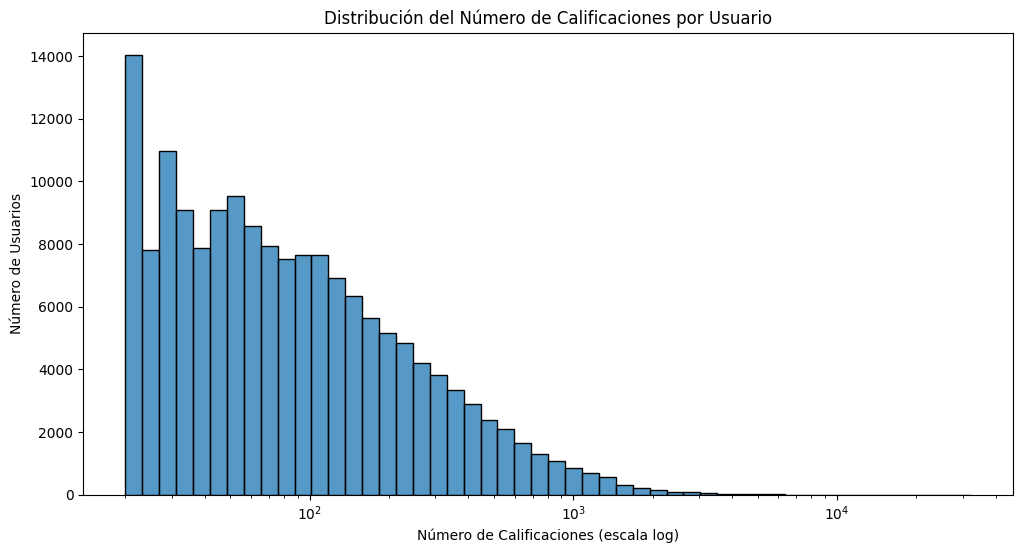

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(user_rating_counts, bins=50, log_scale=True) # Usamos escala logarítmica para ver mejor la cola
plt.title('Distribución del Número de Calificaciones por Usuario')
plt.xlabel('Número de Calificaciones (escala log)')
plt.ylabel('Número de Usuarios')
plt.show()

In [18]:
# --- PASO 1: Definir nuestros dos grupos!!!

# calcular cuántos usuarios son el "Top 1%"
total_usuarios = ratings_df['userId'].nunique()  # nunique() cuenta cuántos usuarios únicos hay
top_1_percent_count = int(total_usuarios * 0.01)

#obtener la lista de los IDs de esos usuarios más activos
user_counts = ratings_df['userId'].value_counts()
top_active_users_ids = user_counts.head(top_1_percent_count).index

# --- PASO 2: Calcular la nota media de cada grupo!!!!11

# Filtrar el DataFrame para tener solo las calificaciones de nuestros "Críticos"
ratings_top_users = ratings_df[ratings_df['userId'].isin(top_active_users_ids)]

# Calcular la nota media de este grupo
mean_rating_top_users = ratings_top_users['rating'].mean()

# Calcular la nota media de TODOS los usuarios para comparar
mean_rating_all_users = ratings_df['rating'].mean()

#PASO 3: Comparar y Concluir

print(f"El Top 1% está formado por {top_1_percent_count} usuarios.")
print(f"La calificación media de los usuarios más activos es: {mean_rating_top_users:.4f}")
print(f"La calificación media de todos los usuarios es: {mean_rating_all_users:.4f}")

# La conclusión final, clara y directa
if mean_rating_top_users < mean_rating_all_users:
    print("\n✅ Conclusión: Los usuarios más activos son MÁS críticos que el promedio.")
else:
    print("\n✅ Conclusión: Los usuarios más activos son MENOS críticos (más 'fans') que el promedio.")

El Top 1% está formado por 1625 usuarios.
La calificación media de los usuarios más activos es: 3.2059
La calificación media de todos los usuarios es: 3.5339

✅ Conclusión: Los usuarios más activos son MÁS críticos que el promedio.


In [ ]:
# Popularidad vs. Calificación Media

# PASO 1: Encontrar las 10 películas MÁS POPULARES (más votadas)

#contar cuántas calificaciones tiene cada película
movie_counts = ratings_df['movieId'].value_counts()

# Unimos esta información con los títulos de las películas para que sea legible
popular_movies_df = movie_counts.to_frame().reset_index()
popular_movies_df.columns = ['movieId', 'num_ratings']
top_10_popular = pd.merge(popular_movies_df, movies_df, on='movieId').head(10)

print("--- TOP 10 PELÍCULAS MÁS POPULARES (POR NÚMERO DE VOTOS) ---")
print(top_10_popular[['title', 'num_ratings']])


# --- PASO 2: Encontrar las 10 películas MEJOR CALIFICADAS (con un filtro) ---

# Primero, calculamos la calificación media para CADA película
movie_mean_ratings = ratings_df.groupby('movieId')['rating'].mean()

# También necesitamos el número de calificaciones para poder filtrar
movie_rating_counts = ratings_df.groupby('movieId')['rating'].count()

# Unimos la media y el conteo en un solo DataFrame
ratings_summary_df = pd.DataFrame({
    'mean_rating': movie_mean_ratings,
    'num_ratings': movie_rating_counts
}).reset_index()

# **EL FILTRO IMPORTANTE**: Solo consideraremos películas con un número mínimo de votos.
# Un buen umbral para empezar es mirar solo películas con más de 1000 calificaciones.
min_votes_threshold = 1000
qualified_movies_df = ratings_summary_df[ratings_summary_df['num_ratings'] >= min_votes_threshold]

# Ahora, ordenamos estas películas calificadas por su nota media
best_rated_movies_df = qualified_movies_df.sort_values(by='mean_rating', ascending=False)

# Y unimos con los títulos para que sea legible
top_10_best_rated = pd.merge(best_rated_movies_df, movies_df, on='movieId').head(10)

print("\n\n--- TOP 10 PELÍCULAS MEJOR CALIFICADAS (CON >1000 VOTOS) ---")
print(top_10_best_rated[['title', 'mean_rating', 'num_ratings']])

--- TOP 10 PELÍCULAS MÁS POPULARES (POR NÚMERO DE VOTOS) ---
                                       title  num_ratings
0                        Forrest Gump (1994)        81491
1           Shawshank Redemption, The (1994)        81482
2                        Pulp Fiction (1994)        79672
3           Silence of the Lambs, The (1991)        74127
4                         Matrix, The (1999)        72674
5  Star Wars: Episode IV - A New Hope (1977)        68717
6                       Jurassic Park (1993)        64144
7                    Schindler's List (1993)        60411
8                          Braveheart (1995)        59184
9                          Fight Club (1999)        58773


--- TOP 10 PELÍCULAS MEJOR CALIFICADAS (CON >1000 VOTOS) ---
                                         title  mean_rating  num_ratings
0                       Planet Earth II (2016)     4.483096         1124
1                          Planet Earth (2006)     4.464797         1747
2             Shaws

--- TOP 5 GÉNEROS MÁS COMUNES EN EL DATASET ---
genres_list
Drama       25606
Comedy      16870
Thriller     8654
Romance      7719
Action       7348
Name: count, dtype: int64


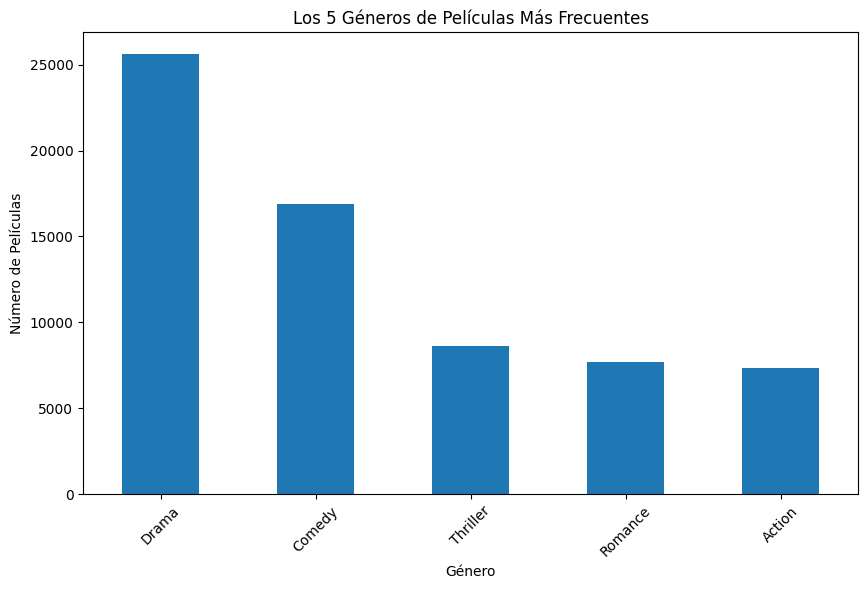

In [20]:
# --- Pregunta 2.2: ¿Cuáles son los 5 géneros más comunes? ---

# Creamos una copia del DataFrame de películas para no modificar el original. Es una buena práctica.
genres_df = movies_df.copy()

# --- PASO 1: Separar las etiquetas de género ---
# Usamos el accesor `.str.split('|')` para dividir cada string por el carácter '|'.
# El resultado es una nueva columna donde cada celda contiene una lista de strings.
genres_df['genres_list'] = genres_df['genres'].str.split('|')


# --- PASO 2: Expandir el DataFrame ---
# El método .explode() toma la columna con las listas y crea una nueva fila para cada elemento de la lista.
# Ahora tendremos una tabla donde cada película puede aparecer varias veces, una por cada género que tenga.
genres_exploded_df = genres_df.explode('genres_list')


# --- PASO 3: Contar los géneros ---
# Ahora que cada género tiene su propia fila, podemos usar .value_counts() sobre la nueva columna.
top_5_genres = genres_exploded_df['genres_list'].value_counts().head(5)


# --- Mostramos el resultado ---
print("--- TOP 5 GÉNEROS MÁS COMUNES EN EL DATASET ---")
print(top_5_genres)

# También podemos visualizarlo para que sea más impactante
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
top_5_genres.plot(kind='bar')
plt.title('Los 5 Géneros de Películas Más Frecuentes')
plt.xlabel('Género')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45) # Rotamos las etiquetas para que se lean mejor
plt.show()

In [22]:
# --- Pregunta 2.3: ¿Qué géneros son los mejor y peor calificados? ---

# --- PASO 1: Reutilizar y Unir ---

# Recordatorio: 'genres_exploded_df' es el DataFrame del paso anterior donde cada género tiene su propia fila.
# Ahora, unimos (merge) esa tabla con todas las calificaciones.
# La columna en común es 'movieId'.
# Esto crea una tabla masiva donde cada calificación está asociada a uno de los géneros de su película.
merged_genre_ratings_df = pd.merge(genres_exploded_df, ratings_df, on='movieId')


# --- PASO 2: Agrupar y Calcular ---

# Agrupamos por la columna de géneros ('genres_list') y calculamos la media de la columna 'rating' para cada grupo.
average_rating_per_genre = merged_genre_ratings_df.groupby('genres_list')['rating'].mean()


# --- PASO 3: Ordenar y Analizar ---

# Ordenamos los resultados de mayor a menor para ver fácilmente el top y el bottom.
sorted_genre_ratings = average_rating_per_genre.sort_values(ascending=False)


# --- Mostramos el resultado ---

print("--- CALIFICACIÓN MEDIA POR GÉNERO (DE MEJOR A PEOR) ---")
print(sorted_genre_ratings)


# Para la respuesta, nos enfocamos en los 5 mejores y los 5 peores.
print("\n\n--- GÉNEROS CON MEJOR CALIFICACIÓN PROMEDIO ---")
print(sorted_genre_ratings.head(5))

print("\n\n--- GÉNEROS CON PEOR CALIFICACIÓN PROMEDIO ---")
print(sorted_genre_ratings.tail(5))

--- CALIFICACIÓN MEDIA POR GÉNERO (DE MEJOR A PEOR) ---
genres_list
Film-Noir             3.925728
War                   3.791466
Documentary           3.705281
Crime                 3.685044
Drama                 3.677185
Mystery               3.670169
Animation             3.614946
IMAX                  3.603712
Western               3.585755
Musical               3.554716
Romance               3.542712
Thriller              3.522964
Adventure             3.517445
Fantasy               3.511589
Sci-Fi                3.478143
Action                3.466592
Children              3.432507
Comedy                3.423993
(no genres listed)    3.326379
Horror                3.293563
Name: rating, dtype: float64


--- GÉNEROS CON MEJOR CALIFICACIÓN PROMEDIO ---
genres_list
Film-Noir      3.925728
War            3.791466
Documentary    3.705281
Crime          3.685044
Drama          3.677185
Name: rating, dtype: float64


--- GÉNEROS CON PEOR CALIFICACIÓN PROMEDIO ---
genres_list
Action     

In [23]:
# --- Pregunta 3.1: ¿Qué porcentaje de películas está "solitario"? ---

# --- PASO 1: Contar las calificaciones por película ---
# Ya conocemos este truco: value_counts() nos da una Serie con el movieId y su número de calificaciones.
movie_counts = ratings_df['movieId'].value_counts()


# --- PASO 2: Filtrar para encontrar las películas "solitarias" ---
# Aquí filtramos esa Serie. Nos quedamos solo con las entradas cuyo valor (el conteo) es menor a 5.
lonely_movies = movie_counts[movie_counts < 5]
lonely_movies_count = len(lonely_movies) # len() nos da el número total de películas solitarias.


# --- PASO 3: Calcular el porcentaje ---
# Necesitamos el número total de películas en nuestro catálogo.
total_movies_count = len(movies_df)

# Calculamos el porcentaje.
percentage_lonely = (lonely_movies_count / total_movies_count) * 100


# --- Mostramos el resultado ---
print(f"Número total de películas en el catálogo: {total_movies_count}")
print(f"Número de películas con menos de 5 calificaciones: {lonely_movies_count}")
print(f"Porcentaje de películas 'solitarias': {percentage_lonely:.2f}%")

Número total de películas en el catálogo: 62423
Número de películas con menos de 5 calificaciones: 26327
Porcentaje de películas 'solitarias': 42.18%


In [24]:
# --- Pregunta 3.2: ¿Qué porcentaje de usuarios son "fantasma"? ---

# --- PASO 1: Contar las calificaciones por usuario ---
# El mismo código que usamos para la pregunta 1.1. ¡Reutilizar es de inteligentes!
user_counts = ratings_df['userId'].value_counts()


# --- PASO 2: Filtrar para encontrar los usuarios con poca actividad ---
# Filtramos la Serie para quedarnos solo con aquellos cuyo conteo de calificaciones es menor a 5.
ghost_users = user_counts[user_counts < 5]
ghost_users_count = len(ghost_users) # Contamos cuántos usuarios son.


# --- PASO 3: Calcular el porcentaje ---
# Necesitamos el número total de usuarios únicos en nuestro dataset.
total_users_count = ratings_df['userId'].nunique()

# Calculamos el porcentaje.
percentage_ghosts = (ghost_users_count / total_users_count) * 100


# --- Mostramos el resultado ---
print(f"Número total de usuarios únicos: {total_users_count}")
print(f"Número de usuarios con menos de 5 calificaciones: {ghost_users_count}")
print(f"Porcentaje de usuarios 'fantasma' (cold start): {percentage_ghosts:.2f}%")

Número total de usuarios únicos: 162541
Número de usuarios con menos de 5 calificaciones: 0
Porcentaje de usuarios 'fantasma' (cold start): 0.00%


La primera calificación del dataset es del: 1995-01-09 11:46:49
La última calificación del dataset es del: 2019-11-21 09:15:03


--- NÚMERO DE CALIFICACIONES POR AÑO ---
rating_date
1995          3
1996    1430093
1997     626202
1998     272099
1999    1059080
2000    1735398
2001    1058750
2002     776654
2003     920295
2004    1048116
2005    1613550
2006    1038458
2007     931432
2008    1018001
2009     810127
2010     792436
2011     676498
2012     635208
2013     515684
2014     478270
2015    1604971
2016    1757440
2017    1689935
2018    1310761
2019    1200634
Name: count, dtype: int64


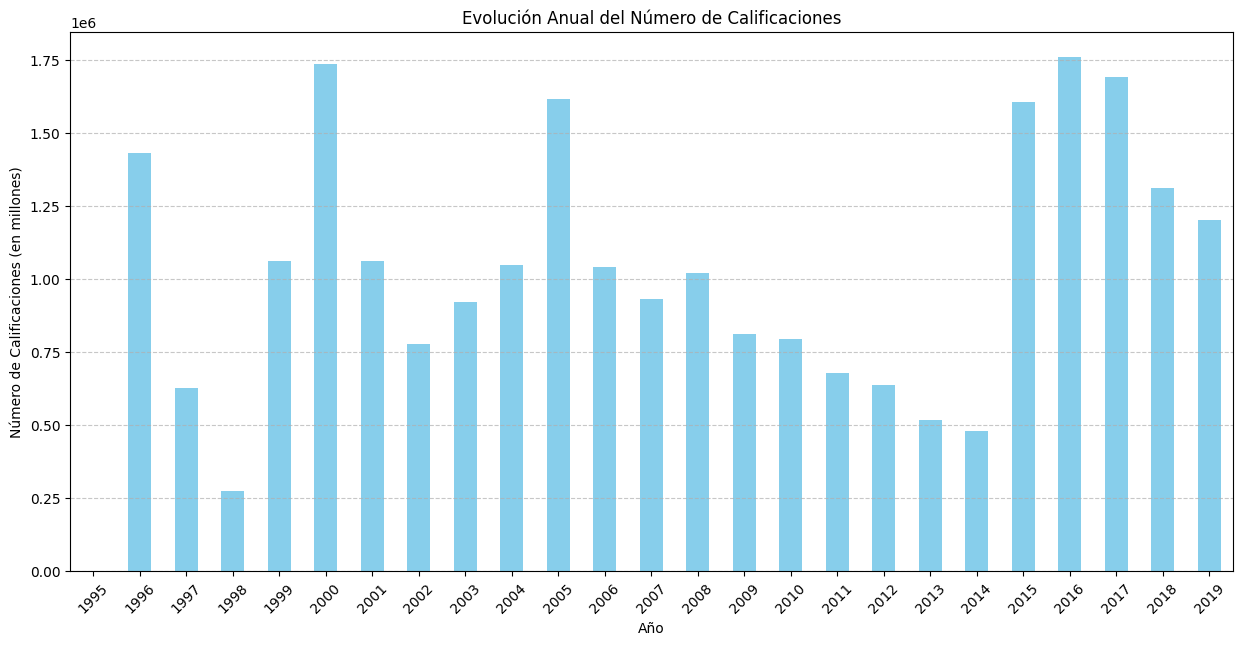


✅ El pico de actividad fue en el año 2016 con 1,757,440 calificaciones.


In [25]:
# --- Pregunta 4.1: Análisis Temporal del Dataset ---

# --- PASO 1: Convertir la columna timestamp ---

# Usamos pd.to_datetime para convertir los números a fechas.
# El argumento unit='s' es CRUCIAL. Le dice a pandas que los números son segundos.
ratings_df['rating_date'] = pd.to_datetime(ratings_df['timestamp'], unit='s')


# --- PASO 2: Encontrar las fechas de inicio y fin ---

first_rating_date = ratings_df['rating_date'].min()
last_rating_date = ratings_df['rating_date'].max()

print(f"La primera calificación del dataset es del: {first_rating_date}")
print(f"La última calificación del dataset es del: {last_rating_date}")


# --- PASO 3: Contar calificaciones por año ---

# El accesor `.dt.year` nos permite extraer solo el año de nuestra nueva columna de fechas.
# Luego, usamos .value_counts() para contar cuántas veces aparece cada año.
# .sort_index() ordena los resultados por año, no por frecuencia, para que el gráfico tenga sentido.
ratings_per_year = ratings_df['rating_date'].dt.year.value_counts().sort_index()


# --- Mostramos el resultado ---

print("\n\n--- NÚMERO DE CALIFICACIONES POR AÑO ---")
print(ratings_per_year)

# Visualizamos los resultados para identificar el pico fácilmente
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
ratings_per_year.plot(kind='bar', color='skyblue')
plt.title('Evolución Anual del Número de Calificaciones')
plt.xlabel('Año')
plt.ylabel('Número de Calificaciones (en millones)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Para ser más explícitos, encontramos el año con el máximo número de calificaciones
peak_year = ratings_per_year.idxmax()
peak_year_count = ratings_per_year.max()

print(f"\n✅ El pico de actividad fue en el año {peak_year} con {peak_year_count:,} calificaciones.")